# Stock Price Prediction using Recurrent-Neural-Networ(RNN)



### About RNN:

     Recurrent Neural Network(RNN) are a type of Neural Network where the output from previous step are fed as input to the current step. In traditional neural networks, all the inputs and outputs are independent of each other, but in cases like when it is required to predict the next word of a sentence, the previous words are required and hence there is a need to remember the previous words.
    
     
     
### About Dataset:
    * we have  2 csv files 
      1. Google_Stock_Price_Train.csv
      2. Google_Stock_Price_Test.csv
    * train data contains stock price records(2012-2016).
    * test data contains stock price records (2017).
    
    * Independent features that we have[Date,Open,High,Low,Close,Volume]
    
### prediction:

* we have to select 60 time stamps that at each time t our RNN is consider the last  60 stock prices, then RNN will try to predict the next stock price, using past 60 timestamps values our RNN is try to understand the next prediction values. 


### Importing useful Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

### Reading the dataset

In [3]:
train_data = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
#print top 6 data points
train_data.head(6)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"


In [5]:
train_data.shape

(1258, 6)

**observation**
   train data contains 1258 data points and  6  independent features

# 1. select only one 'Open' Feature (RNN on 'Open' feature)

In [6]:
train_opn_set = train_data.iloc[:, 1:2].values   #iloc[: #select all rows,  1:2 select 2 nd column only]
train_opn_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range = (0, 1))   #scale between 0 to 1 ranges

training_data_scaled = scaler.fit_transform(train_opn_set)

In [8]:
training_data_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## Creating a data structure with 60 time stamps and 1 output

In [9]:
#https://stackoverflow.com/questions/49212114/add-input-to-numpy-3d-array
X_train = []
y_train = []


for i in range(60, 1258):    # 60: number of past days that we  want to use to predict the future
    
    X_train.append(training_data_scaled[i-60:i, 0])#1st iteration it creates 0th index to 59th indext as train data
    y_train.append(training_data_scaled[i, 0])  #60 th index data point as class lable data in y_train
    
    
X_train, y_train = np.array(X_train), np.array(y_train)   #converting into array 


In [10]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [11]:
#observe in data frame 
d = pd.DataFrame(X_train)
d.head(3)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.085814,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,...,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977
1,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,...,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279
2,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,...,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716


In [12]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [13]:
dd = pd.DataFrame(y_train)
dd.head(3)

,0
0,0.086279
1,0.084716
2,0.074541


## Reshaping

In [14]:
print("before reshaing:",X_train.shape)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("after reshaing:",X_train.shape)

before reshaing: (1198, 60)
after reshaing: (1198, 60, 1)


## Building the RNN

In [17]:
# Initialising the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))


### Compiling the model

In [18]:
#selecting Adam optimizer  and loss is mean_squered loss
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### Fitiing model on train data

In [19]:
#train model 40 epochs
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

W1222 11:35:41.779579 140340715349824 deprecation.py:323] From /home/nagesh/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1222 11:35:43.607723 140340715349824 deprecation_wrapper.py:119] From /home/nagesh/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0510
Epoch 2/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0063
Epoch 3/30
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0065
Epoch 4/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0052
Epoch 5/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 6/30
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 7/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 8/30
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 9/30
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 10/30
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0046
Epoch 11/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 12/30
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0045
E

## Making the predictions and observing the results

### Read the the test data (2017 data)

In [20]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
test_data.head(4)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"


In [21]:
## selecting 'Open' feature
original_stock_price = test_data.iloc[:, 1:2].values  #selecting 'open' feature data
original_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### predicted stock price of 2017

In [22]:
#concatinating train open feature and test open feature
total_dataset = pd.concat((train_data['Open'], test_data['Open']), axis = 0)  #concatinating train and test data 'open' feature values

In [23]:
print("length of the train data:",len(train_data))
print("length of the test data:",len(test_data))

print("length of the concatinating feature:",len(total_dataset))
total_dataset.head(6)

length of the train data: 1258
length of the test data: 20
length of the concatinating feature: 1278


0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
5    313.70
Name: Open, dtype: float64

In [24]:
inputs = total_dataset[len(total_dataset) - len(test_data) - 60:].values
print(len(inputs))
inputs

80


array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [25]:
inputs = inputs.reshape(-1,1)  #converting into column
print("shape of the inputs:",inputs.shape)

shape of the inputs: (80, 1)


###  min max scalar

In [26]:
inputs = scaler.transform(inputs)

In [27]:
inputs[20]

array([0.90804747])

In [28]:
X_test = []
for i in range(60, 80):   
    X_test.append(inputs[i-60:i, 0])   #creating 60 time stams for every data point 
    
X_test = np.array(X_test)       #converting into array 

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#now predict on test data
predicted_stock_price = model.predict(X_test)


predicted_stock_price = scaler.inverse_transform(predicted_stock_price)   #convert into original values(inverse scalar)


## Plotting the predicted and actual values

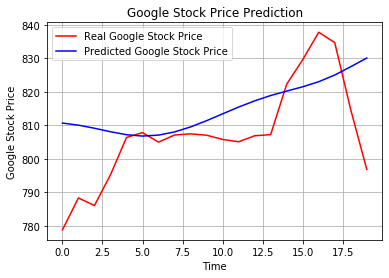

In [29]:
# Visualising the results
plt.plot(original_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.grid()
plt.show()


## Concusion


we can observe real stock price and predicted stock price values got similar 'open' values. 


# 2.  Predict stock price using  feature 'High'

### select only one 'High' Feature (RNN on 'High' feature)

In [30]:
train_data.head(4)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"


In [31]:
train_high_set = train_data.iloc[:, 2:3].values   #iloc[: #select all rows,  2:3 select 3 nd column only]
train_high_set

array([[332.83],
       [333.87],
       [330.75],
       ...,
       [794.23],
       [785.93],
       [782.78]])

### Feature scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))   #scale between 0 to 1 ranges

training_data_scaled = scaler.fit_transform(train_high_set)

In [33]:
training_data_scaled

array([[0.09640129],
       [0.09834351],
       [0.09251685],
       ...,
       [0.95807422],
       [0.94257381],
       [0.93669113]])

## Creating a data structure with 60 time stamps and 1 output


In [34]:
#https://stackoverflow.com/questions/49212114/add-input-to-numpy-3d-array

X_train = []

y_train = []

for i in range(60, 1258):    #creating 60 time stams for every data point 

    

    X_train.append(training_data_scaled[i-60:i, 0])#1st iteration it creates 0th index to 59th indext as train data

    y_train.append(training_data_scaled[i, 0])  #60 th index data point as class lable data in y_train

    
X_train, y_train = np.array(X_train), np.array(y_train)   #converting into array 

### Reshaping

In [35]:
print("before reshaing:",X_train.shape)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("after reshaing:",X_train.shape)

before reshaing: (1198, 60)
after reshaing: (1198, 60, 1)


### Build the RNN

In [36]:
# Initialising the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))


In [37]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [38]:
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0419
Epoch 2/30
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0064
Epoch 3/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0067
Epoch 4/30
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0062
Epoch 5/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0057
Epoch 6/30
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0056
Epoch 7/30
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0050
Epoch 8/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 9/30
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0041
Epoch 10/30
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 11/30
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 12/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0038
E

## Making the predictions and visualising the results


### Get the test data (2017 data)

In [39]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
test_data.head(4)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"


In [40]:
real_stock_price = test_data.iloc[:,2:3 ].values  #selecting 'open' feature data
real_stock_price

array([[789.63],
       [791.34],
       [794.48],
       [807.9 ],
       [809.97],
       [809.13],
       [808.15],
       [807.39],
       [811.22],
       [807.14],
       [806.21],
       [809.48],
       [806.91],
       [820.87],
       [825.9 ],
       [835.77],
       [838.  ],
       [841.95],
       [815.84],
       [801.25]])

In [41]:
## predicted stock price of 2017

total_dataset = pd.concat((train_data['High'], test_data['High']), axis = 0)  #concatinating train and test data 'open' feature values


In [42]:
print("length of the train data:",len(train_data))
print("length of the test data:",len(test_data))

print("length of the concatinating feature:",len(total_dataset))
total_dataset.head(6)

length of the train data: 1258
length of the test data: 20
length of the concatinating feature: 1278


0    332.83
1    333.87
2    330.75
3    328.77
4    322.29
5    315.72
Name: High, dtype: float64

In [43]:
inputs = total_dataset[len(total_dataset) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
print("shape of the inputs:",inputs.shape)

shape of the inputs: (80, 1)


In [44]:
inputs = scaler.transform(inputs)

In [45]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])   #creating 60 time stams for every data point 
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)


predicted_stock_price = scaler.inverse_transform(predicted_stock_price)   #convert into original values


### Visualising the predicted and actual values

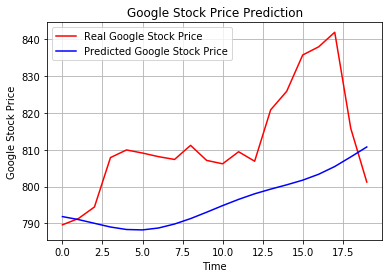

In [46]:

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')

plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')

plt.xlabel('Time')
plt.grid()

plt.ylabel('Google Stock Price')

plt.legend()

plt.show()

### Concusion

we can observe real stock price and predicted stock price values.


# 3. Predict stock price using feature 'Low'


### select only one 'Low' Feature (RNN on 'Low' feature)

In [51]:
train_data.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


In [52]:
train_high_set = train_data.iloc[:, 3:4].values   #iloc[: #select all rows,  3:4 select  4 nd column only]
train_high_set

array([[324.97],
       [329.08],
       [326.89],
       ...,
       [783.2 ],
       [778.92],
       [770.41]])

### Feature scaling


In [53]:
# Feature scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))   #scale between 0 to 1 ranges

training_data_scaled = scaler.fit_transform(train_high_set)

In [54]:
training_data_scaled

array([[0.09044931],
       [0.09823458],
       [0.09408623],
       ...,
       [0.95844067],
       [0.95033338],
       [0.93421352]])

## Creating a data structure with 60 time stamps and 1 output

In [55]:
#https://stackoverflow.com/questions/49212114/add-input-to-numpy-3d-array

X_train = []

y_train = []

for i in range(60, 1258):    #creating 60 time stams for every data point 

    

    X_train.append(training_data_scaled[i-60:i, 0])#1st iteration it creates 0th index to 59th indext as train data

    y_train.append(training_data_scaled[i, 0])  #60 th index data point as class lable data in y_train

    
X_train, y_train = np.array(X_train), np.array(y_train)   #converting into array 

### Reshaping

In [56]:
print("before reshaing:",X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("after reshaing:",X_train.shape)

before reshaing: (1198, 60)
after reshaing: (1198, 60, 1)


## Build the RNN

In [57]:
# Initialising the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))


In [58]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [59]:
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0477
Epoch 2/30
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0064
Epoch 3/30
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0057
Epoch 4/30
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0053
Epoch 5/30
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 6/30
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0053
Epoch 7/30
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0047
Epoch 8/30
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0052
Epoch 9/30
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 10/30
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0039
Epoch 11/30
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 12/30
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
E

## Making the predictions and visualising the results
### Get the test data (2017 data)


In [60]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
test_data.head(4)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"


In [61]:
real_stock_price = test_data.iloc[:,3:4 ].values  #selecting 'open' feature data
real_stock_price

array([[775.8 ],
       [783.16],
       [785.02],
       [792.2 ],
       [802.83],
       [803.51],
       [801.37],
       [799.17],
       [806.69],
       [800.37],
       [800.99],
       [801.8 ],
       [801.69],
       [803.74],
       [817.82],
       [825.06],
       [827.01],
       [820.44],
       [799.8 ],
       [790.52]])

In [62]:
## predicted stock price of 2017

total_dataset = pd.concat((train_data['High'], test_data['High']), axis = 0)  #concatinating train and test data 'open' feature values


In [63]:
print("length of the train data:",len(train_data))
print("length of the test data:",len(test_data))

print("length of the concatinating feature:",len(total_dataset))
total_dataset.head(6)

length of the train data: 1258
length of the test data: 20
length of the concatinating feature: 1278


0    332.83
1    333.87
2    330.75
3    328.77
4    322.29
5    315.72
Name: High, dtype: float64

In [64]:
inputs = total_dataset[len(total_dataset) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
print("shape of the inputs:",inputs.shape)

shape of the inputs: (80, 1)


In [65]:
inputs = scaler.transform(inputs)

In [66]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])   #creating 60 time stams for every data point 
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)


predicted_stock_price = scaler.inverse_transform(predicted_stock_price)   #convert into original values


### Visualising the predicted and actual values


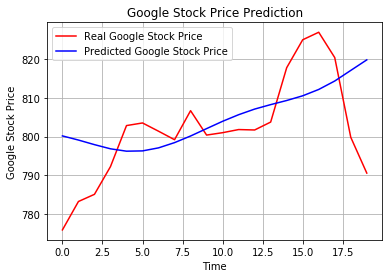

In [67]:

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')

plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')

plt.xlabel('Time')
plt.grid()

plt.ylabel('Google Stock Price')

plt.legend()

plt.show()

# Concusion

we can observe real stock price and predicted stock price values for each each individual  fetures.
